In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [154]:
def to_hours(time):
    return (time // 3600) + 6

def clean_sales_data():
    df = pd.read_csv("../data/master_data/sales_data.csv")
    sales_df = df[['token_id', 'sold_at', 'price']]
    sales_df = sales_df.rename(columns={'token_id': 'horse_id', 'sold_at': 'time_sold'}).sort_values('horse_id').reset_index(drop=True)
    sales_df['timestamp'] = sales_df['time_sold'].apply(to_hours)

    return sales_df

In [155]:
sales_data = clean_sales_data()

In [156]:
eth_prices = pd.read_csv('../data/master_data/eth_price_history.csv')
eth_prices.tail()

,Unnamed: 0,timestamp,eth_price
9091,9091,464923,1533.01
9092,9092,464924,1529.65
9093,9093,464925,1535.38
9094,9094,464926,1538.76
9095,9095,464927,1550.97


In [157]:
merged = pd.merge(sales_data, eth_prices, left_on='timestamp', right_on='timestamp', how='left')
merged['converted_price'] = merged['price'] * merged['eth_price']
clean_market_data = merged.drop(columns=['Unnamed: 0', 'price', 'timestamp','eth_price'])
clean_market_data.shape

def to_day(unix_time):
    return datetime.date.fromtimestamp(unix_time)

clean_market_data['day_sold'] = clean_market_data['time_sold'].apply(to_day)
clean_market_data

,horse_id,time_sold,converted_price,day_sold
0,27,1650124789,60665.000,2022-04-16
1,68,1657313128,13934.205,2022-07-08
2,75,1657313072,9693.360,2022-07-08
3,89,1657313100,9693.360,2022-07-08
4,92,1663112422,10943.775,2022-09-13
...,...,...,...,...
74906,520344,1673482196,139.492,2023-01-11
74907,520345,1673514341,138.079,2023-01-12
74908,520346,1673487400,139.884,2023-01-11
74909,520404,1673622818,499.436,2023-01-13


### Deal with outliers

In [158]:
# Calculate the z-score for each data point
clean_market_data['z_score'] = np.abs((clean_market_data['converted_price'] - np.mean(clean_market_data['converted_price'])) / np.std(clean_market_data['converted_price']))

clean_market_data
market_data_no_outliers = clean_market_data[clean_market_data['z_score'] < 3]
print(clean_market_data.shape, market_data_no_outliers.shape, f'=> {74911 - 74820} data points removed')

(74911, 5) (74820, 5) => 91 data points removed


In [159]:
# horse data cleaning
horse_data = pd.read_csv('../data/master_data/all_horse_meta_oliver_6k.csv')
horse_data.columns
horse_data = horse_data.rename(columns={'data.horse.bloodline':'bloodline', 'data.horse.breed_type':'breed_type',
                           'data.horse.breeding_counter':'breeding_counter', 'data.horse.color':'horse_color',
                           'data.horse.horse_type':'horse_type', 'data.horse.img_url':'img_url',
                           'data.horse.last_breeding_reset':'last_breeding_reset', 'data.horse.name':'horse_name',
                           'data.horse.nft_id':'nft_id', 'data_horse_offsprings':'offsprings',
                           'data.horse.race_statistic.first_place_finishes':'first_place_finishes',
                           'data.horse.race_statistic.number_of_races':'number_races',
       'data.horse.race_statistic.second_place_finishes':'second_place_finishes',
       'data.horse.race_statistic.third_place_finishes':'third_place_finishes',
       'data.horse.race_statistic.win_rate':'win_rate',
                                        'data.horse.gen':'genotype'})
horse_data = horse_data.drop(columns=['Unnamed: 0'])
# print(horse_data.nft_id)
horse_data.head()

,bloodline,breed_type,horse_color,genotype,horse_type,img_url,data.horse.inserted_at,horse_name,nft_id,data.horse.parents,first_place_finishes,data.horse.race_statistic.free_win_rate,data.horse.race_statistic.number_of_free_races,data.horse.race_statistic.number_of_paid_races,number_races,data.horse.race_statistic.paid_win_rate,second_place_finishes,third_place_finishes,win_rate,data.horse.super_coat
0,Buterin,genesis,Anti-Flash White,Z9,Mare,https://img.zed.run/horses/F2F3F4.png,2021-07-09T15:47:37,Sneaky Flirt,42102,[],8,4.60,174,53,227,0.0,15,16,3.52,False
1,Buterin,genesis,Shadow Fighter,Z9,Mare,https://img.zed.run/horses/BFAFB2.png,2021-07-09T15:47:35,Master Of Irony,42104,[],17,5.03,318,20,338,5.0,25,35,5.03,False
2,Buterin,pacer,Caribbean Green,Z268,Colt,https://img.zed.run/horses/00CC99.png,2022-06-29T07:32:05,King Casen,435320,"[{'name': 'Z268 Midnight Black XV', 'nft_id': ...",0,0.00,12,0,12,0.0,0,0,0.00,False
3,Buterin,pacer,Ghost White,Z268,Stallion,https://img.zed.run/horses/FFFFFF.png,2022-06-29T07:34:16,King Crew,435325,"[{'name': 'King Gerardo', 'nft_id': 416984}, {...",0,0.00,7,0,7,0.0,0,0,0.00,False
4,Buterin,pacer,Antique White,Z268,Filly,https://img.zed.run/horses/FAEBD7.png,2022-06-29T07:35:25,Queen Iliana,435326,"[{'name': 'Z268 White Smoke IV', 'nft_id': 382...",0,0.00,20,0,20,0.0,0,1,0.00,False


In [160]:
# code to merge horse data with sales data
test_merge = pd.merge(horse_data,market_data_no_outliers, right_on='horse_id', left_on='nft_id', how='left')
test_merge

,bloodline,breed_type,horse_color,genotype,horse_type,img_url,data.horse.inserted_at,horse_name,nft_id,data.horse.parents,...,data.horse.race_statistic.paid_win_rate,second_place_finishes,third_place_finishes,win_rate,data.horse.super_coat,horse_id,time_sold,converted_price,day_sold,z_score
0,Buterin,genesis,Anti-Flash White,Z9,Mare,https://img.zed.run/horses/F2F3F4.png,2021-07-09T15:47:37,Sneaky Flirt,42102,[],...,0.00,15,16,3.52,False,42102.0,1.672836e+09,86.945520,2023-01-04,0.025410
1,Buterin,genesis,Shadow Fighter,Z9,Mare,https://img.zed.run/horses/BFAFB2.png,2021-07-09T15:47:35,Master Of Irony,42104,[],...,5.00,25,35,5.03,False,42104.0,1.669888e+09,102.400000,2022-12-01,0.025328
2,Buterin,genesis,Shadow Fighter,Z9,Mare,https://img.zed.run/horses/BFAFB2.png,2021-07-09T15:47:35,Master Of Irony,42104,[],...,5.00,25,35,5.03,False,42104.0,1.669113e+09,73.711300,2022-11-22,0.025480
3,Buterin,pacer,Caribbean Green,Z268,Colt,https://img.zed.run/horses/00CC99.png,2022-06-29T07:32:05,King Casen,435320,"[{'name': 'Z268 Midnight Black XV', 'nft_id': ...",...,0.00,0,0,0.00,False,435320.0,1.658539e+09,10.752347,2022-07-22,0.025814
4,Buterin,pacer,Caribbean Green,Z268,Colt,https://img.zed.run/horses/00CC99.png,2022-06-29T07:32:05,King Casen,435320,"[{'name': 'Z268 Midnight Black XV', 'nft_id': ...",...,0.00,0,0,0.00,False,435320.0,1.660522e+09,4.137903,2022-08-14,0.025849
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9554,Finney,exclusive,Desert Sand,Z18,Stallion,https://img.zed.run/horses/EDC9AF.png,2022-07-24T18:34:21,26 Characters,450640,"[{'name': 'Daring', 'nft_id': 409080}, {'name'...",...,0.00,10,6,10.24,False,450640.0,1.662137e+09,7.899900,2022-09-02,0.025829
9555,Finney,legendary,Suave Mauve,Z12,Stallion,https://img.zed.run/horses/D473D4.png,2021-07-21T20:54:05,Helicopter Money,57425,"[{'name': 'Bezzy', 'nft_id': 26573}, {'name': ...",...,12.30,101,81,12.39,False,57425.0,1.670804e+09,62.376000,2022-12-11,0.025540
9556,Finney,legendary,Suave Mauve,Z12,Stallion,https://img.zed.run/horses/D473D4.png,2021-07-21T20:54:05,Helicopter Money,57425,"[{'name': 'Bezzy', 'nft_id': 26573}, {'name': ...",...,12.30,101,81,12.39,False,57425.0,1.672445e+09,23.855400,2022-12-30,0.025744
9557,Finney,legendary,Suave Mauve,Z12,Stallion,https://img.zed.run/horses/D473D4.png,2021-07-21T20:54:05,Helicopter Money,57425,"[{'name': 'Bezzy', 'nft_id': 26573}, {'name': ...",...,12.30,101,81,12.39,False,57425.0,1.673209e+09,28.721250,2023-01-08,0.025718


## Exploratory Data Analysis

### Price Distribution

<AxesSubplot: xlabel='converted_price'>

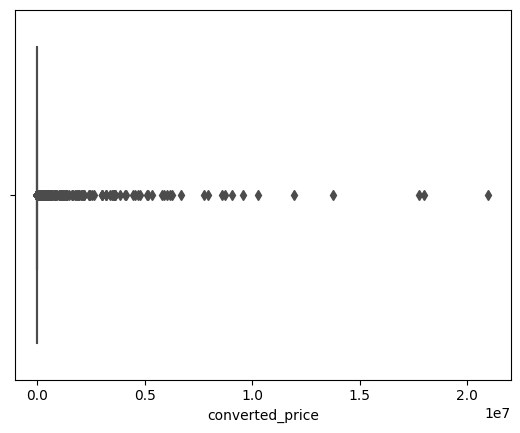

In [161]:
sns.boxplot(data = clean_market_data, x='converted_price', color='red')
# plt.xlim(0,20000)
# plt.ylim(0,80)

The distribution of prices is highly right skewed.

### Win rate vs Price

<AxesSubplot: xlabel='win_rate', ylabel='converted_price'>

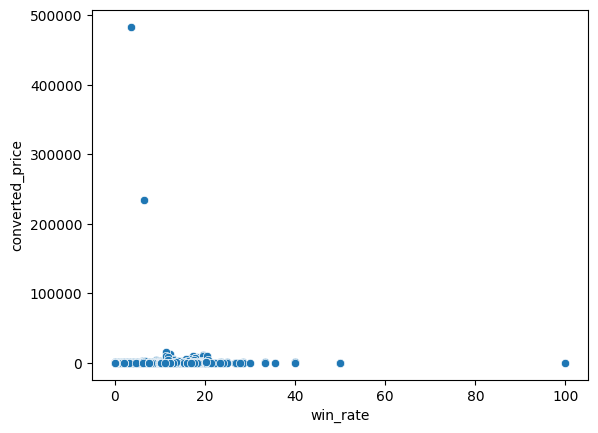

In [162]:
sns.scatterplot(data=test_merge, x='win_rate', y='converted_price')

### Different Factors by Breed

In [163]:
by_breed = test_merge.groupby('breed_type').mean().reset_index()
by_breed

/var/folders/ys/99fy7jvd78ldkj5yxhg35plh0000gn/T/ipykernel_6343/2082808561.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  by_breed = test_merge.groupby('breed_type').mean().reset_index()


,breed_type,nft_id,first_place_finishes,data.horse.race_statistic.free_win_rate,data.horse.race_statistic.number_of_free_races,data.horse.race_statistic.number_of_paid_races,number_races,data.horse.race_statistic.paid_win_rate,second_place_finishes,third_place_finishes,win_rate,data.horse.super_coat,horse_id,time_sold,converted_price,z_score
0,cross,400932.760049,7.895250,5.606797,89.485993,12.081608,101.567600,1.600000,7.903776,8.110840,5.353861,0.010962,400932.760049,1.661670e+09,301.539453,0.027225
1,elite,387340.858771,13.568081,7.070095,133.810640,31.378721,165.189360,3.384541,14.197593,14.241925,6.660177,0.014566,387308.837136,1.661663e+09,29.958574,0.025712
2,exclusive,348434.234057,22.430718,7.950661,188.881803,58.513189,247.394992,3.701840,21.475459,21.202671,7.443262,0.008681,348434.234057,1.660502e+09,104.924060,0.025361
3,genesis,45132.384749,21.256499,6.871802,185.301560,68.461005,253.762565,4.201629,21.093588,20.809359,6.473206,0.000000,45126.371080,1.660569e+09,392.552240,0.024140
4,legendary,282911.961979,26.055428,7.909125,218.187815,75.840586,294.028401,3.555346,26.392121,25.886395,7.345721,0.022446,282911.961979,1.659556e+09,408.647098,0.026134
5,pacer,417540.318376,2.736467,2.746752,50.284900,3.861823,54.146724,0.886019,3.220798,3.479345,2.677785,0.013533,417540.318376,1.660938e+09,12.428314,0.025805


Text(0.5, 1.0, 'Mean Win Rate by Breed Type')

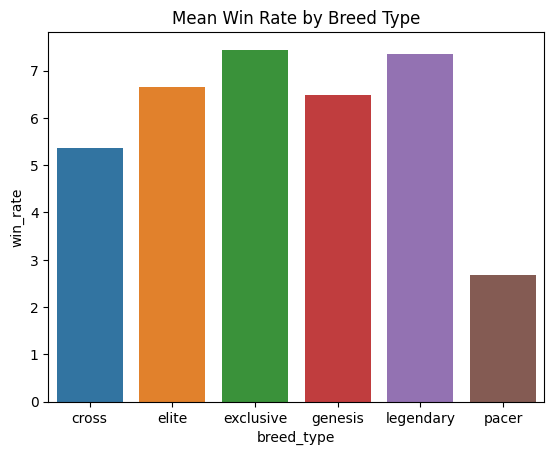

In [164]:
sns.barplot(data=by_breed, x='breed_type', y='win_rate')
plt.title('Mean Win Rate by Breed Type')

Text(0.5, 1.0, 'Mean Number of 1st Place Finishes by Breed')

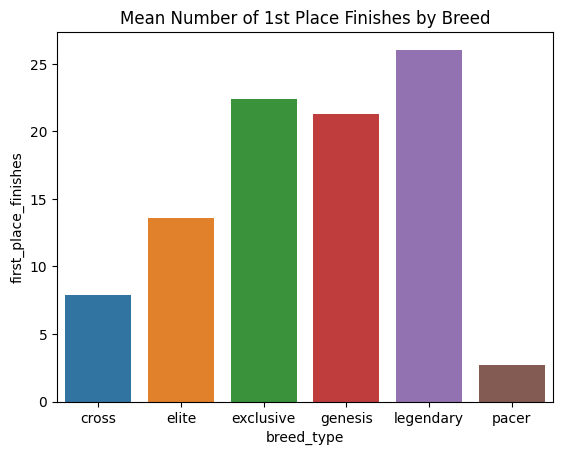

In [165]:
sns.barplot(data=by_breed, x='breed_type', y='first_place_finishes')
plt.title('Mean Number of 1st Place Finishes by Breed')

<AxesSubplot: xlabel='breed_type', ylabel='converted_price'>

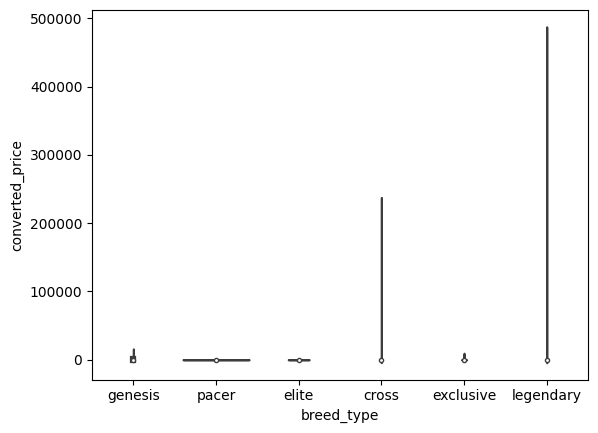

In [166]:
sns.violinplot(data=test_merge, x='breed_type', y='converted_price')

### Different Factors by Bloodline

In [167]:
by_blood = test_merge.groupby('bloodline').mean().reset_index()
by_blood

/var/folders/ys/99fy7jvd78ldkj5yxhg35plh0000gn/T/ipykernel_6343/1323334638.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  by_blood = test_merge.groupby('bloodline').mean().reset_index()


,bloodline,nft_id,first_place_finishes,data.horse.race_statistic.free_win_rate,data.horse.race_statistic.number_of_free_races,data.horse.race_statistic.number_of_paid_races,number_races,data.horse.race_statistic.paid_win_rate,second_place_finishes,third_place_finishes,win_rate,data.horse.super_coat,horse_id,time_sold,converted_price,z_score
0,Buterin,316358.360687,13.648007,5.431207,120.975403,34.979220,155.954623,2.383607,12.378923,11.734521,5.171934,0.015267,316504.522284,1.660564e+09,212.503497,0.026337
1,Finney,343299.277046,18.525472,7.233841,173.783057,45.152833,218.935890,3.441774,18.672582,18.720092,6.929090,0.016027,343299.277046,1.660734e+09,46.969512,0.025622
2,Nakamoto,374279.973044,22.896934,8.682648,198.620507,67.029598,265.650106,3.793959,24.939218,25.282241,7.936485,0.008457,374279.973044,1.660716e+09,273.669914,0.024693
3,Szabo,344165.094684,23.274917,8.295282,211.270764,61.904485,273.175249,3.938862,24.375415,25.060631,7.660365,0.008306,344165.094684,1.660731e+09,118.589153,0.025284


(array([0, 1, 2, 3]),
 [Text(0, 0, 'Buterin'),
  Text(1, 0, 'Finney'),
  Text(2, 0, 'Nakamoto'),
  Text(3, 0, 'Szabo')])

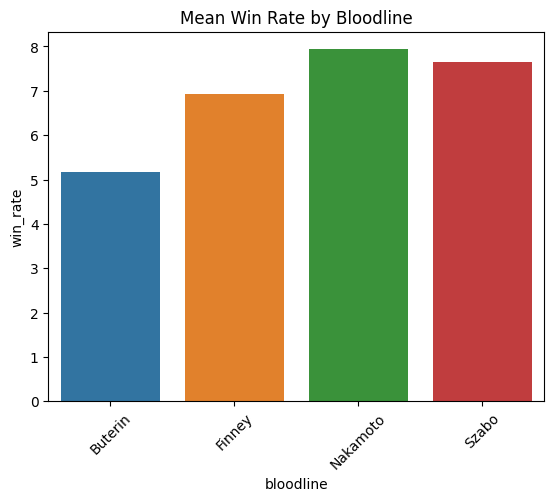

In [168]:
sns.barplot(data=by_blood, x='bloodline', y='win_rate')
plt.title('Mean Win Rate by Bloodline')
plt.xticks(rotation = 45)

In [ ]:
sns.lineplot(data=test_merge, x='day_sold', y='converted_price', hue= 'bloodline')